In [87]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install optuna

   ---------------------------------------- 379.9/379.9 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 226.8/226.8 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 78.7/78.7 kB 4.6 MB/s eta 0:00:00


In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

### Импорт и обработка "размеченных" данных

In [2]:
def norm_dataset(dataset):
    dataset['Дата и время'] = pd.to_datetime(dataset['Дата и время'], errors='coerce')
    for i in dataset.columns[1:]:
        dataset[i] = pd.to_numeric(dataset[i], errors='coerce')
    return dataset

In [3]:
data_raw_norm = pd.read_csv(r'dataset._normal.csv', delimiter = ';')
data_raw_anomaly = pd.read_csv(r'dataset._anomaly.csv', delimiter = ';')
data_raw_problems = pd.read_csv(r'dataset._problems.csv', delimiter = ';')

c:\users\vsevo\pycharmprojects\tractors\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3,12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,41,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\vsevo\pycharmprojects\tractors\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3,11,12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,41,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [126]:
list(gigadataset_train.columns)


['index',
 'Давл.масла двиг.,кПа',
 'Темп.масла двиг.,°С',
 'КПП. Температура масла',
 'КПП. Давление масла в системе смазки',
 'Скорость',
 'ДВС. Давление смазки',
 'ДВС. Температура охлаждающей жидкости',
 'Давление в пневмостистеме (spn46), кПа',
 'Уровень топлива % (spn96)',
 'Электросистема. Напряжение',
 'ДВС. Частота вращения коленчатого вала',
 'Нейтраль КПП (spn3843)',
 'Стояночный тормоз (spn3842)',
 'Засоренность фильтра КПП (spn3847)',
 'Аварийное давление масла ДВС (spn3846)',
 'Засоренность фильтра ДВС (spn3845)',
 'Засоренность фильтра рулевого управления (spn3844)',
 'Засоренность фильтра навесного оборудования (spn3851)',
 'Аварийная температура масла в гидросистеме (spn3849)',
 'Аварийное давление в I контуре тормозной системы (spn3848)',
 'Аварийное давление в II контуре тормозной системы (spn3855)',
 'Зарядка АКБ (spn3854)',
 'nan_num']

In [4]:
data_norm = norm_dataset(data_raw_norm)
data_anomaly = norm_dataset(data_raw_anomaly)
data_problems = norm_dataset(data_raw_problems)

In [5]:
data_norm['label'] = 0
data_anomaly['label'] = 1
data_problems['label'] = 2

In [6]:
gigadataset = pd.concat([data_norm, data_anomaly, data_problems])

In [7]:
len(gigadataset)

3345794

In [8]:
print (len(data_norm))
print (len(data_anomaly))
print (len(data_problems))

print (sum([len(data_norm), len(data_anomaly), len(data_problems)]))

892883
189704
2263207
3345794


In [9]:
print(max(data_norm['Дата и время']))
print(min(data_norm['Дата и время']))

print(max(data_anomaly['Дата и время']))
print(min(data_anomaly['Дата и время']))


print(max(data_problems['Дата и время']))
print(min(data_problems['Дата и время']))

2023-12-07 23:59:42
2023-01-05 00:00:09
2023-12-06 23:59:31
2023-01-05 00:00:23
2023-12-10 14:23:21
2023-01-06 08:30:34


In [11]:
nan_count = gigadataset.isnull().sum(axis=0)

In [13]:
full_nan_columns = nan_count.loc[nan_count == len(gigadataset)].index

In [128]:
list(full_nan_columns)

['Полож.пед.акселер.,%',
 'Нагрузка на двигатель, %',
 'Обор.двиг.,об/мин',
 'Значение счетчика моточасов, час:мин',
 'Сост.пед.сцепл.',
 'iButton2',
 'Крутящий момент (spn513), Нм',
 'Положение рейки ТНВД (spn51), %',
 'Расход топлива (spn183), л/ч',
 'ДВС. Температура наддувочного воздуха, °С',
 'Давление наддувочного воздуха двигателя (spn106), кПа',
 'Текущая передача (spn523)',
 'Температура масла гидравлики (spn5536), С',
 'Педаль слива (spn598)']

In [14]:
gigadataset = gigadataset.drop(columns = full_nan_columns)

In [15]:
drop_col = []

for i in gigadataset.columns:
    if len(gigadataset[i].unique()) <= 2:
        drop_col.append(i)

In [129]:
drop_col

['Аварийная температура охлаждающей жидкости (spn3841)',
 'Засоренность воздушного фильтра (spn3840)',
 'Недопустимый уровень масла в гидробаке (spn3850)',
 'Отопитель (spn3853)',
 'Выход блока управления двигателем (spn3852)',
 'Включение тормозков (spn3859)',
 'Засоренность фильтра слива (spn3858)',
 'Аварийное давление масла КПП (spn3857)',
 'Аварийная температура масла ДВС(spn3856)',
 'Неисправность тормозной системы (spn3863)',
 'Термостарт (spn3862)',
 'Разрешение запуска двигателя (spn3861)',
 'Низкий уровень ОЖ (spn3860)',
 'Аварийная температура масла ГТР (spn3867)',
 'Необходимость сервисного обслуживания (spn3866)',
 'Подогрев топливного фильтра (spn3865)',
 'Вода в топливе (spn3864)',
 'Холодный старт (spn3871)']

In [16]:
gigadataset = gigadataset.drop(columns = drop_col)

In [22]:
nan_count_series = gigadataset.isnull().sum(axis=1)

In [24]:
gigadataset ['nan_num'] = nan_count_series

In [25]:
gigadataset = gigadataset.drop_duplicates(subset=['label', 'Дата и время'])

In [31]:
gigadataset = gigadataset.sort_values(by = 'Дата и время')
gigadataset = gigadataset.reset_index()

In [32]:
gigadataset = gigadataset.fillna(method = 'ffill', axis = 0)
gigadataset = gigadataset.fillna(0, axis = 0)

In [33]:
nan_count = gigadataset.isnull().sum()
print(nan_count)

index                                                          0
Дата и время                                                   0
Давл.масла двиг.,кПа                                           0
Темп.масла двиг.,°С                                            0
КПП. Температура масла                                         0
КПП. Давление масла в системе смазки                           0
Скорость                                                       0
ДВС. Давление смазки                                           0
ДВС. Температура охлаждающей жидкости                          0
Давление в пневмостистеме (spn46), кПа                         0
Уровень топлива % (spn96)                                      0
Электросистема. Напряжение                                     0
ДВС. Частота вращения коленчатого вала                         0
Нейтраль КПП (spn3843)                                         0
Стояночный тормоз (spn3842)                                    0
Засоренность фильтра КПП 

In [35]:
gigadataset.to_csv('clean_data_no_leak.csv')

## Детекция аномалий IsolationForest

In [95]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score

In [96]:
gigadataset_train = gigadataset.drop(columns = ['label', 'Дата и время'])
data_test = gigadataset.loc[gigadataset.label < 2]
data_test_X = data_test.drop(columns = ['label', 'Дата и время'])
data_test_y = data_test['label']

In [97]:
def objective(trial):

    param = {
        "n_estimators":  trial.suggest_int ("n_estimators", 20, 250),
        "contamination": trial.suggest_float("contamination", 0.001, 0.5)
    }

    clf = IsolationForest(**param, random_state=42).fit(gigadataset_train)
    prediction = clf.predict(data_test_X)
    prediction = prediction < 0
    accuracy = f1_score(data_test_y, prediction)

    return accuracy

In [98]:
study_forest = optuna.create_study(direction="maximize")
study_forest.optimize(objective, n_trials=20)

[I 2024-03-31 03:07:18,672] A new study created in memory with name: no-name-2a70b066-b6a7-4cf9-b10d-9ffcb49658e3
c:\users\vsevo\pycharmprojects\tractors\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[I 2024-03-31 03:08:13,459] Trial 0 finished with value: 0.44330017362693336 and parameters: {'n_estimators': 35, 'contamination': 0.26367656487308705}. Best is trial 0 with value: 0.44330017362693336.
c:\users\vsevo\pycharmprojects\tractors\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[I 2024-03-31 03:14:12,149] Trial 1 finished with value: 0.3835422013887695 and parameters: {'n_estimators': 223, 'contamination': 0.3782002544753966}. Best is trial 0 with value: 0.44330017362693336.
c:\users\vsevo\pycharmpro

c:\users\vsevo\pycharmprojects\tractors\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
[I 2024-03-31 04:23:11,538] Trial 19 finished with value: 0.5506070284753125 and parameters: {'n_estimators': 249, 'contamination': 0.18522190831897406}. Best is trial 15 with value: 0.7104960135901331.


In [113]:
clf = IsolationForest(**study_forest.best_trial.params).fit(gigadataset_train)

c:\users\vsevo\pycharmprojects\tractors\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [114]:
import joblib

joblib.dump(clf, 'forest.joblib')

['forest.joblib']

## Test

In [115]:
predict_test_proba = clf.decision_function(data_test_X)

In [116]:
predict_test_proba = -1*predict_test_proba

(array([107086., 181691., 135569., 183871., 107678.,  94267., 118459.,
         73956.,  17423.,   1381.]),
 array([-0.20856199, -0.16812666, -0.12769133, -0.08725601, -0.04682068,
        -0.00638535,  0.03404997,  0.0744853 ,  0.11492063,  0.15535595,
         0.19579128]),
 <BarContainer object of 10 artists>)

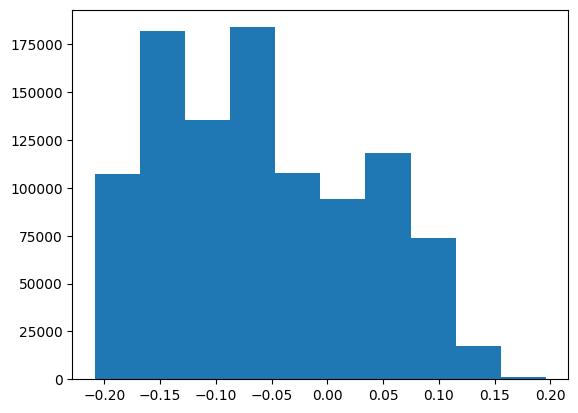

In [117]:
plt.hist(clf.predict())

In [131]:
print(classification_report(data_test_y, clf.predict(data_test_X) < 0))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91    831677
           1       0.59      0.91      0.71    189704

    accuracy                           0.86   1021381
   macro avg       0.78      0.88      0.81   1021381
weighted avg       0.90      0.86      0.87   1021381



## Predict

In [132]:
data_prediction = gigadataset.loc[gigadataset.label == 2]

In [135]:
data_prediction['predict'] = clf.predict(data_prediction.drop(columns = ['label', 'Дата и время']))

c:\users\vsevo\pycharmprojects\tractors\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
data_prediction[['index','predict']].to_csv('prediction.csv')